In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
(train_image,train_label),(test_image,test_label)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_label,test_label

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [4]:
#transform into one-hot code
train_label_onehot=tf.keras.utils.to_categorical(train_label)
test_label_onehot=tf.keras.utils.to_categorical(test_label)

In [5]:
train_label_onehot,test_label_onehot

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [6]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))# avoid overfit
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # label is one hot
              metrics=['acc']
)

In [9]:
history=model.fit(train_image,train_label_onehot,epochs=10,validation_data=(test_image,test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6930 - acc: 0.6222 - val_loss: 0.7043 - val_acc: 0.7587
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7704 - acc: 0.7120 - val_loss: 0.6597 - val_acc: 0.7279
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6801 - acc: 0.7487 - val_loss: 0.5604 - val_acc: 0.7990
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6149 - acc: 0.7790 - val_loss: 0.5475 - val_acc: 0.8088
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5741 - acc: 0.8015 - val_loss: 0.4979 - val_acc: 0.8292
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5162 - acc: 0.8225 - val_loss: 0.5048 - val_acc: 0.8288
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4947 - acc: 0.8303 - val_loss: 0.4543 - val_acc: 0.8460
Epoch 8/10
1875/1875 [==============================] - 2s 1ms

In [10]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

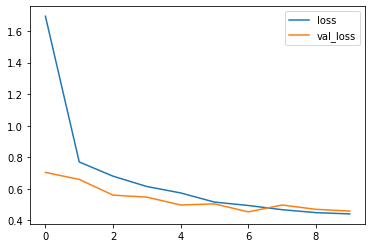

In [11]:
plt.plot(history.epoch,history.history.get("loss"),label='loss')
plt.plot(history.epoch,history.history.get("val_loss"),label='val_loss')
plt.legend()

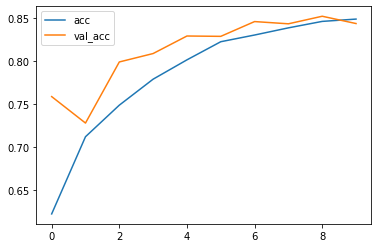

In [12]:
plt.plot(history.epoch,history.history.get("acc"),label='acc')
plt.plot(history.epoch,history.history.get("val_acc"),label='val_acc')
plt.legend()

In [13]:
pre=model.predict(test_image)

In [14]:
pre.shape

(10000, 10)

In [15]:
pre[0]

array([1.3580017e-16, 8.4456173e-15, 2.6740572e-22, 1.9945146e-19,
       3.2487490e-19, 6.1185742e-03, 6.2459316e-18, 1.8913200e-01,
       2.5572147e-08, 8.0474943e-01], dtype=float32)

In [16]:
np.argmax(pre[0])

9

In [17]:
test_label[0]

9

In [18]:
test_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)